In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [2]:
df = pd.read_csv('car_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info() # NO MISSING VALUES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum() # CHECKING THE MISSING VALUES

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [9]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [10]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

## Trying OneHotEncoder

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
ohe = OneHotEncoder()

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
ohe.fit_transform(df[['Fuel_Type']])

<301x3 sparse matrix of type '<class 'numpy.float64'>'
	with 301 stored elements in Compressed Sparse Row format>

In [15]:
ohe.categories_

[array(['CNG', 'Diesel', 'Petrol'], dtype=object)]

In [16]:
ohe.categories_[0]

array(['CNG', 'Diesel', 'Petrol'], dtype=object)

In [17]:
fuel_df = pd.DataFrame(ohe.fit_transform(df[['Fuel_Type']]).toarray(),columns=ohe.categories_[0])

In [18]:
fuel_df.shape

(301, 3)

In [19]:
df = pd.concat([df,fuel_df],axis='columns')

In [20]:
df.drop(columns=['CNG'])

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0.0,1.0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1.0,0.0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0.0,1.0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0.0,1.0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,1.0,0.0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,0.0,1.0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,0.0,1.0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1.0,0.0


In [21]:
ohe.fit_transform(df[['Seller_Type']])

<301x2 sparse matrix of type '<class 'numpy.float64'>'
	with 301 stored elements in Compressed Sparse Row format>

In [22]:
ohe.categories_[0]

array(['Dealer', 'Individual'], dtype=object)

In [23]:
seller_df = pd.DataFrame(ohe.fit_transform(df[['Seller_Type']]).toarray(),columns=ohe.categories_[0]).drop(columns=['Dealer'])

In [24]:
df = pd.concat([df,seller_df],axis='columns')

In [25]:
transmission_df = pd.DataFrame(ohe.fit_transform(df[['Transmission']]).toarray(),columns=ohe.categories_[0]).drop(columns=['Automatic'])

In [26]:
df = pd.concat([df,transmission_df],axis='columns')
df.drop(columns=['Fuel_Type','Seller_Type','Transmission'],inplace=True)

In [27]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,CNG,Diesel,Petrol,Individual,Manual
0,ritz,2014,3.35,5.59,27000,0,0.0,0.0,1.0,0.0,1.0
1,sx4,2013,4.75,9.54,43000,0,0.0,1.0,0.0,0.0,1.0
2,ciaz,2017,7.25,9.85,6900,0,0.0,0.0,1.0,0.0,1.0
3,wagon r,2011,2.85,4.15,5200,0,0.0,0.0,1.0,0.0,1.0
4,swift,2014,4.60,6.87,42450,0,0.0,1.0,0.0,0.0,1.0
5,vitara brezza,2018,9.25,9.83,2071,0,0.0,1.0,0.0,0.0,1.0
6,ciaz,2015,6.75,8.12,18796,0,0.0,0.0,1.0,0.0,1.0
7,s cross,2015,6.50,8.61,33429,0,0.0,1.0,0.0,0.0,1.0
8,ciaz,2016,8.75,8.89,20273,0,0.0,1.0,0.0,0.0,1.0
9,ciaz,2015,7.45,8.92,42367,0,0.0,1.0,0.0,0.0,1.0


## Dynamic OHE

In [65]:
cars = pd.read_csv('car_data.csv')

In [66]:
for col in cars.columns:
    print(cars[col].dtype)

object
int64
float64
float64
int64
object
object
object
int64


In [67]:
for col in cars.columns:
    print(col)

Car_Name
Year
Selling_Price
Present_Price
Kms_Driven
Fuel_Type
Seller_Type
Transmission
Owner


In [29]:
cols = ['Fuel_Type','Seller_Type','Transmission']

In [30]:
ohe = OneHotEncoder()
for col in cols:
    new_cols = pd.DataFrame(ohe.fit_transform(cars[[col]]).toarray(),columns=ohe.categories_[0]).drop(columns=[ohe.categories_[0][0]])
    cars = pd.concat([cars,new_cols],axis='columns')
    cars.drop(columns=[col],inplace=True)

In [31]:
cars.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Diesel,Petrol,Individual,Manual
0,ritz,2014,3.35,5.59,27000,0,0.0,1.0,0.0,1.0
1,sx4,2013,4.75,9.54,43000,0,1.0,0.0,0.0,1.0
2,ciaz,2017,7.25,9.85,6900,0,0.0,1.0,0.0,1.0
3,wagon r,2011,2.85,4.15,5200,0,0.0,1.0,0.0,1.0
4,swift,2014,4.60,6.87,42450,0,1.0,0.0,0.0,1.0
5,vitara brezza,2018,9.25,9.83,2071,0,1.0,0.0,0.0,1.0
6,ciaz,2015,6.75,8.12,18796,0,0.0,1.0,0.0,1.0
7,s cross,2015,6.50,8.61,33429,0,1.0,0.0,0.0,1.0
8,ciaz,2016,8.75,8.89,20273,0,1.0,0.0,0.0,1.0
9,ciaz,2015,7.45,8.92,42367,0,1.0,0.0,0.0,1.0


### Splitting into Input and Output Features

In [32]:
x = cars.drop(columns=['Car_Name','Selling_Price'])
x.head(10)

,Year,Present_Price,Kms_Driven,Owner,Diesel,Petrol,Individual,Manual
0,2014,5.59,27000,0,0.0,1.0,0.0,1.0
1,2013,9.54,43000,0,1.0,0.0,0.0,1.0
2,2017,9.85,6900,0,0.0,1.0,0.0,1.0
3,2011,4.15,5200,0,0.0,1.0,0.0,1.0
4,2014,6.87,42450,0,1.0,0.0,0.0,1.0
5,2018,9.83,2071,0,1.0,0.0,0.0,1.0
6,2015,8.12,18796,0,0.0,1.0,0.0,1.0
7,2015,8.61,33429,0,1.0,0.0,0.0,1.0
8,2016,8.89,20273,0,1.0,0.0,0.0,1.0
9,2015,8.92,42367,0,1.0,0.0,0.0,1.0


In [33]:
y = cars['Selling_Price']

In [34]:
y.head(10)

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
5    9.25
6    6.75
7    6.50
8    8.75
9    7.45
Name: Selling_Price, dtype: float64

### Initiating train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=23)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()

In [38]:
x_train = pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)

In [39]:
x_test = pd.DataFrame(sc.transform(x_test),columns=x_test.columns)

In [40]:
x_train.head()

,Year,Present_Price,Kms_Driven,Owner,Diesel,Petrol,Individual,Manual
0,0.799350,-0.450245,-0.688817,-0.174741,-0.517306,0.528792,-0.724861,0.385922
1,1.144669,0.058392,-0.861082,-0.174741,-0.517306,0.528792,-0.724861,0.385922
2,0.108712,0.702979,0.090239,-0.174741,-0.517306,0.528792,-0.724861,0.385922
3,1.144669,-0.468997,-0.894789,-0.174741,-0.517306,0.528792,-0.724861,0.385922
4,0.454031,-0.806526,0.050673,-0.174741,-0.517306,0.528792,1.379575,0.385922


In [41]:
x_test.head()

,Year,Present_Price,Kms_Driven,Owner,Diesel,Petrol,Individual,Manual
0,0.108712,-0.609634,-0.768649,-0.174741,-0.517306,0.528792,1.379575,0.385922
1,0.454031,0.281068,-0.234534,-0.174741,-0.517306,0.528792,-0.724861,0.385922
2,0.454031,-0.794806,-0.483442,-0.174741,-0.517306,0.528792,1.379575,0.385922
3,-1.963203,-0.822934,-0.900882,-0.174741,-0.517306,0.528792,1.379575,-2.591194
4,-1.617884,-0.045914,1.057377,-0.174741,-0.517306,0.528792,-0.724861,0.385922


### Model Training

In [42]:
linear_reg = LinearRegression()

In [43]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [44]:
y_train_pred = linear_reg.predict(x_train)

In [45]:
error_score = metrics.r2_score(y_train,y_train_pred)
error_score

0.8897447583870702

Text(0, 0.5, 'Predicted Price')

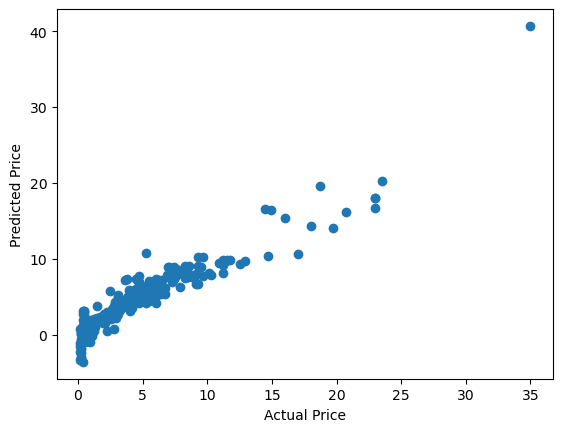

In [46]:
plt.scatter(y_train,y_train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [47]:
y_pred = linear_reg.predict(x_test)

In [48]:
error_score = metrics.r2_score(y_test,y_pred)

In [49]:
error_score

0.8452649601044216

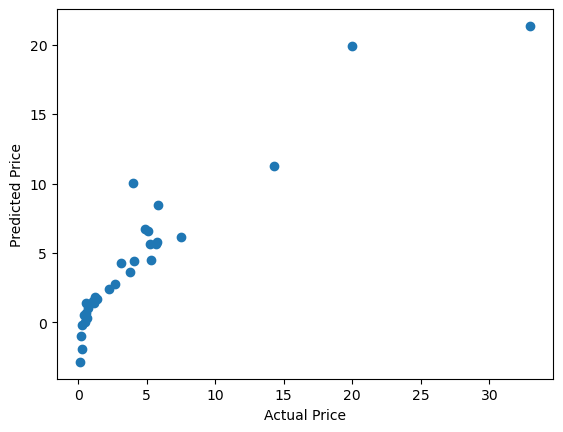

In [50]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

Lasso Regression

In [51]:
lasso_reg = Lasso()

In [52]:
lasso_reg.fit(x_train,y_train)

Lasso()

In [53]:
y_train_pred = lasso_reg.predict(x_train)

In [54]:
error_score = metrics.r2_score(y_train,y_train_pred)
error_score

0.7692470982655262

Text(0, 0.5, 'Predicted Price')

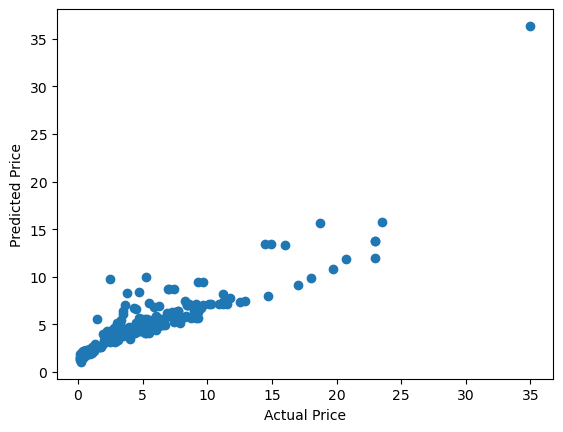

In [55]:
plt.scatter(y_train,y_train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [56]:
y_pred = lasso_reg.predict(x_test)

In [57]:
error_score = metrics.r2_score(y_test,y_pred)
error_score

0.7053040259960415

Text(0, 0.5, 'Predicted Price')

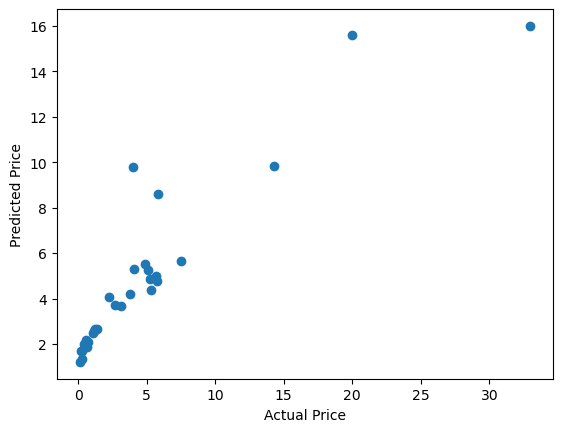

In [58]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')